# This section presents the implemention and the analysis of the DBSCAN. 


## In the first part:

1. For the DBSCAN clustering, we still use sklearn's make_blobs dataset generation tool to create a synthetic dataset suitable for clustering. This dataset contains multiple "clusters" or groups, which clearly demonstrates the effectiveness of the K-means clustering algorithm.
2. Moreover, we add some noises data sample in order to demonstrate DBSCAN's ability to handle noise.
3. we display the data sample distribution. 

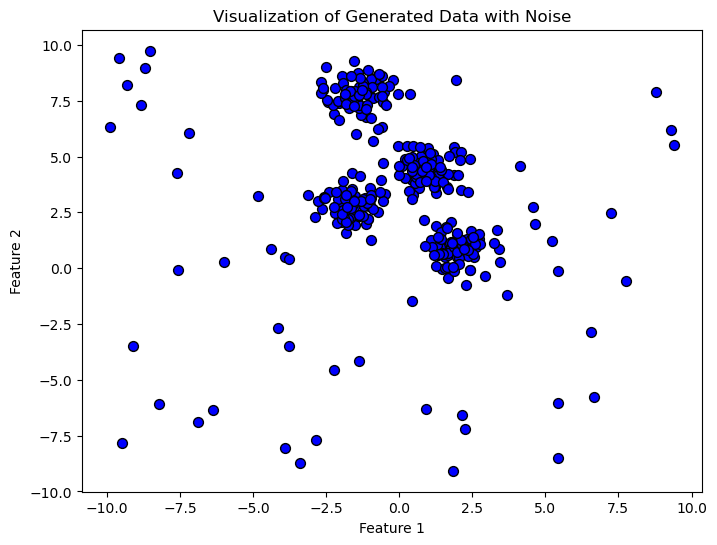

In [53]:
# Import necessary libraries for data handling and visualization
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Generate synthetic data using make_blobs
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Adding noise
np.random.seed(42)
n_noise=50
noise = np.random.uniform(low=-10, high=10, size=(n_noise, 2))
X = np.vstack([X, noise])

# Plotting the generated data
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], s=50, c='blue', marker='o', edgecolor='black')
plt.title('Visualization of Generated Data with Noise')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


## In the second part:

1. we setup and train the DBSCAN models. The two main parameters of the DBSCAN clustering algorithm are eps (neighborhood size) and min_samples (minimum number of samples required to form dense regions). Here we set eps to 0.5 and min_samples to 5.

2. we display the clustering results in different colors, where each color represents a cluster. 

3. we can observe that most of the noise data can be correctly identified into one cluster.

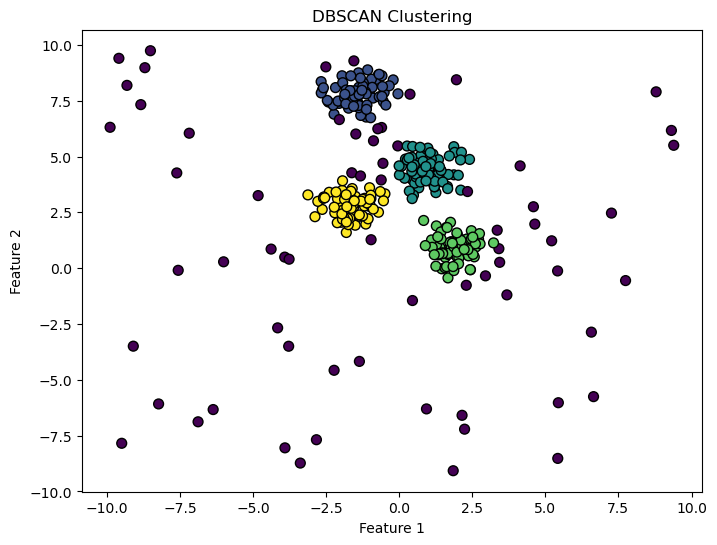

In [54]:
# Import DBSCAN from sklearn
from sklearn.cluster import DBSCAN

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(X)

# Plotting the clustering result
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=clusters, s=50, cmap='viridis', marker='o', edgecolor='black')
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


## Comparison to K-Means:

Here, we compare the DBSCAN to the K-Means. Based on the results of K-means shown below, we can observe that the noise data sample apparently induce the K-means to construct the strange clusters.

K-means is very sensitive to noise and outliers. Since the goal is to minimize within-cluster variance, noise or outliers can significantly affect the calculation of centroids, resulting in less than ideal cluster shapes and sizes. These noise points may be incorrectly classified into a certain cluster, or affect the center position of the cluster, reducing the quality of the overall clustering.

DBSCAN performs well in handling noise. The algorithm can identify and label noisy points that do not belong to any major clusters. It treats these points as background noise and focuses on the clustering of dense areas, which makes it highly robust to outliers. Because DBSCAN clusters based on the relative density between points, it is able to identify clusters of any shape, which makes it very effective when dealing with real-world data, especially those where cluster shapes are complex or vary in size.

D:\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


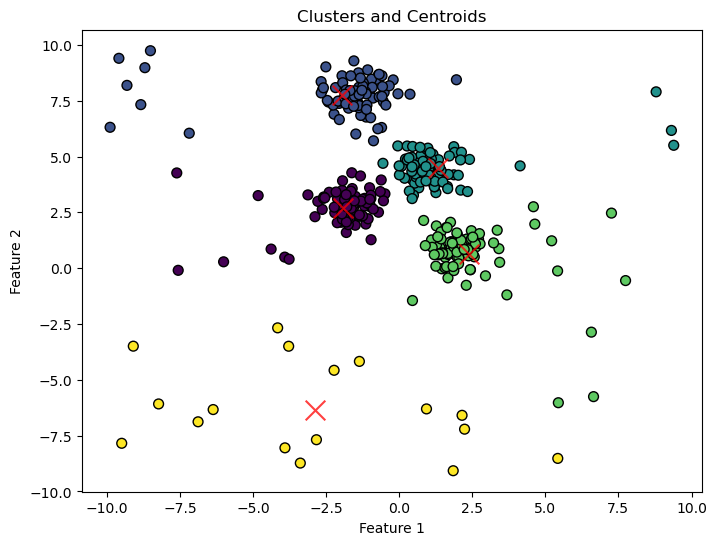

In [58]:
# Import necessary libraries for data handling and visualization
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Generate synthetic data using make_blobs
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Adding noise
np.random.seed(42)
n_noise=50
noise = np.random.uniform(low=-10, high=10, size=(n_noise, 2))
X = np.vstack([X, noise])

# Import KMeans from sklearn
from sklearn.cluster import KMeans

# Apply K-means clustering
kmeans = KMeans(n_clusters=5, n_init=10, random_state=0)
kmeans.fit(X)

# Predict the cluster labels
y_kmeans = kmeans.predict(X)

# Centers of the clusters
centers = kmeans.cluster_centers_

# Plotting the clusters and their centers
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis', marker='o', edgecolor='black')
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='x')
plt.title('Clusters and Centroids')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()